In [1]:
import os
import sys

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# signal processing
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy.integrate import trapz

# misc
import warnings

In [2]:
# style settings
# sns.set(style='whitegrid', rc={'axes.facecolor': '#EFF2F7'})

# sample frequency for ECG sensor
settings = {}
settings['fs'] = 125

In [3]:
# plt.figure(figsize=(20, 7))
# start = 0
# stop = 125*30
# # df = pd.read_csv("C:/Users/Bpradsad/Desktop/491/ecg.csv", sep=";", index_col="ms")
# dataa = np.load("E:/Directory_D_Desk_jup/Raw_npy/Signal_ECG/shhs1-200023.npy")[start:stop]

# duration = (stop-start) / settings['fs']
# plt.title("ECG signal, slice of %.1f seconds" % duration)
# plt.plot(dataa, color="#51A6D8", linewidth=1)
# plt.xlabel("Time (ms)", fontsize=16)
# plt.ylabel("Amplitude (arbitrary unit)")
# plt.show()

Text(0, 0.5, 'Amplitude (arbitrary unit)')

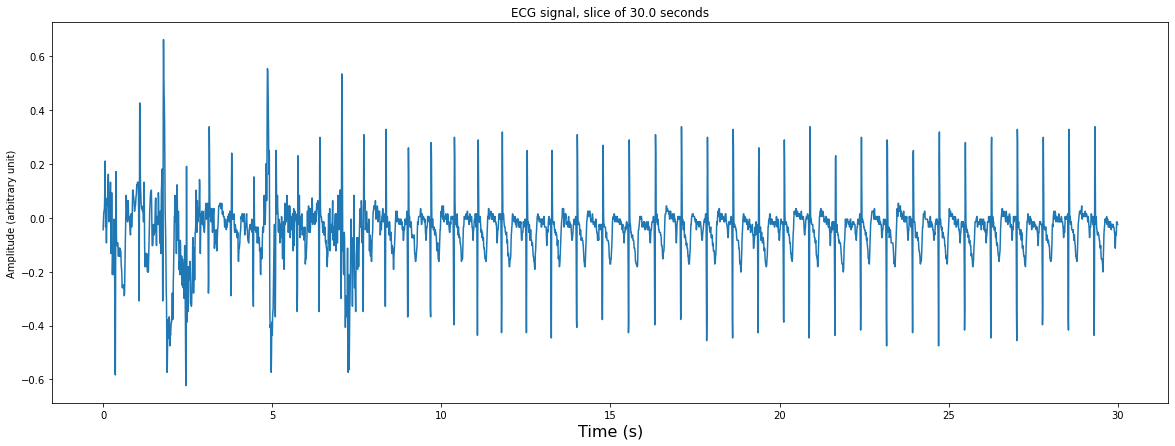

In [4]:
start_l = 0
secondstart = 100
seconds_to_show = 30
whichsecondtostart = 0
SF = 125
zoom_f = 0 
zoom_e = 50000000
Dir = "D:/Directory_D_Desk_jup/Raw_npy/Signal_ECG/shhs1-200028.npy"
#===========================================================================
start_l = start_l
seconds_to_show = seconds_to_show


# starting the fig for signal of eeg from whichsecondtostart
whichsecondtostart = whichsecondtostart
start = SF * secondstart
stop = SF * seconds_to_show + start

dividend = SF * seconds_to_show

X = np.linspace(start_l, seconds_to_show, dividend, endpoint=True)
y = np.load(Dir)[start:stop]

# % when you want to zoom in the pic
fromh = zoom_f
Tohere = zoom_e

plt.figure(figsize=(20, 7))
plt.plot(X[fromh:Tohere], y[fromh:Tohere], '-')
plt.title("ECG signal, slice of %.1f seconds" % seconds_to_show)
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Amplitude (arbitrary unit)")

In [ ]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(y, height=min(np.max(y), .1))
plt.figure(figsize=(20, 7))
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()

In [ ]:
temp_matrix = []

In [ ]:
temp_matrix.append(y)

In [ ]:
temp_matrix = np.array(temp_matrix)

In [ ]:
temp_matrix = []

for i in range(1000):
    temp_matrix.append(y)
temp_matrix = np.array(temp_matrix)

In [ ]:
Peak_matrix = [find_peaks(temp_matrix[i,:], height=.2)[0] for i in range(len(temp_matrix))]
HRV_rr_matrix = [timedomain(np.diff(Peak_matrix[i]))[1] for i in range(len(Peak_matrix))]

In [ ]:
np.array(HRV_rr_matrix).shape

In [ ]:
# https://www.kaggle.com/code/bjoernjostein/heart-rate-variability-hrv-analysis/notebook
def timedomain(rr):
    results = {}
    hr = 60000/rr
    results['Mean RR (ms)'] = np.mean(rr)
    results['STD RR/SDNN (ms)'] = np.std(rr)
    results['Mean HR (Kubios\' style) (beats/min)'] = 60000/np.mean(rr)
    results['Mean HR (beats/min)'] = np.mean(hr)
    results['STD HR (beats/min)'] = np.std(hr)
    results['Min HR (beats/min)'] = np.min(hr)
    results['Max HR (beats/min)'] = np.max(hr)
    results['RMSSD (ms)'] = np.sqrt(np.mean(np.square(np.diff(rr))))
    results['NNxx'] = np.sum(np.abs(np.diff(rr)) > 50)*1
    results['pNNxx (%)'] = 100 * np.sum((np.abs(np.diff(rr)) > 50)*1) / len(rr)
    
    return results, [results['Mean RR (ms)'], results['STD RR/SDNN (ms)'], results['Mean HR (Kubios\' style) (beats/min)'],
                    results['Mean HR (beats/min)'], results['STD HR (beats/min)'], results['Min HR (beats/min)'],
                    results['Max HR (beats/min)'], results['RMSSD (ms)'], results['NNxx'], results['pNNxx (%)']]

In [ ]:
np.abs(np.diff(rr))

In [ ]:
timedomain(rr)